![](http://cdn-camfb.nitrocdn.com/RMpMSgSWMfckXLTWtklDpXdhPcWPyPoy/assets/static/optimized/rev-b7d7d39/wp-content/uploads/2020/01/Easy-Peasy-Removals_Tips-for-optimising-moving-in-the-rain.jpg)

Did it rain the next day, Yes or No? Our goal is to find out the answer to this question.

Data Defination:
[http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://)


# Libraries

In [1]:
!pip install feature-engine
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.impute import SimpleImputer
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score,roc_curve,accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


weather = pd.read_csv("../input/weather-dataset-rattle-package/weatherAUS.csv")
df = weather.copy()

     |████████████████████████████████| 180 kB 5.0 MB/s 
/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


# Data Exploration

In [2]:
df.shape

(145460, 23)

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe(include="Float64").T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


In [6]:
df["Date"] = pd.to_datetime(df['Date'])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df.drop("Date",axis=1,inplace=True)
df.head()


,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


## Let's inspect the Cardinality

*(number of different categories)*

In [7]:
cat_df=[var for var in df.columns if df[var].dtype =="O"]
num_df=[var for var in df.columns if df[var].dtype !="O" and df[var].dtype !="int64" and var!="RainTomorrow" ]

for col in cat_df:
    print(col,df[col].unique(),"\n")
    print(col,"Contains: ",df[col].nunique(),"label","\n")
    print("---------")

Location ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru'] 

Location Contains:  49 label 

---------
WindGustDir ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW'] 

WindGustDir Contains:  16 label 

---------
WindDir9am ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE'] 

WindDir9am Contains:  16 label 

---------
WindDir3pm ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW'

## Let's inspect the categorical variable values

In [8]:
for var in cat_df:
    print(df[var].value_counts())

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown         3009


<AxesSubplot:>

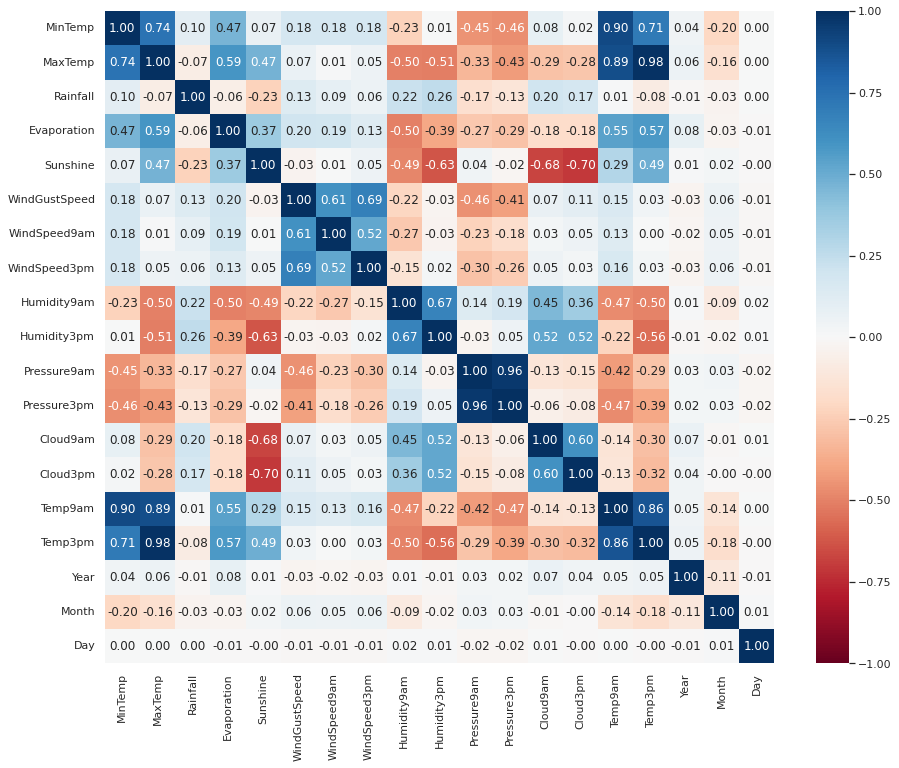

In [9]:
cor=df.corr()
sns.set(rc = {"figure.figsize":(15,12)})
sns.heatmap(cor, annot=True, cmap="RdBu",vmin=-1,vmax=1,fmt=".2f")

## Missing Values

In [10]:
missing_percent = df.isnull().sum()/len(df)*100
missing_total = df.isnull().sum()
missing_table = pd.concat([missing_total,missing_percent],axis=1)
missing_rename = missing_table.rename(columns= {0:"Missing Value",1:"% of Total Values"})
missing_table = missing_rename[missing_rename.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
missing_table

,Missing Value,% of Total Values
Sunshine,69835,48.0
Evaporation,62790,43.2
Cloud3pm,59358,40.8
Cloud9am,55888,38.4
Pressure9am,15065,10.4
Pressure3pm,15028,10.3
WindDir9am,10566,7.3
WindGustDir,10326,7.1
WindGustSpeed,10263,7.1
Humidity3pm,4507,3.1


<AxesSubplot:>

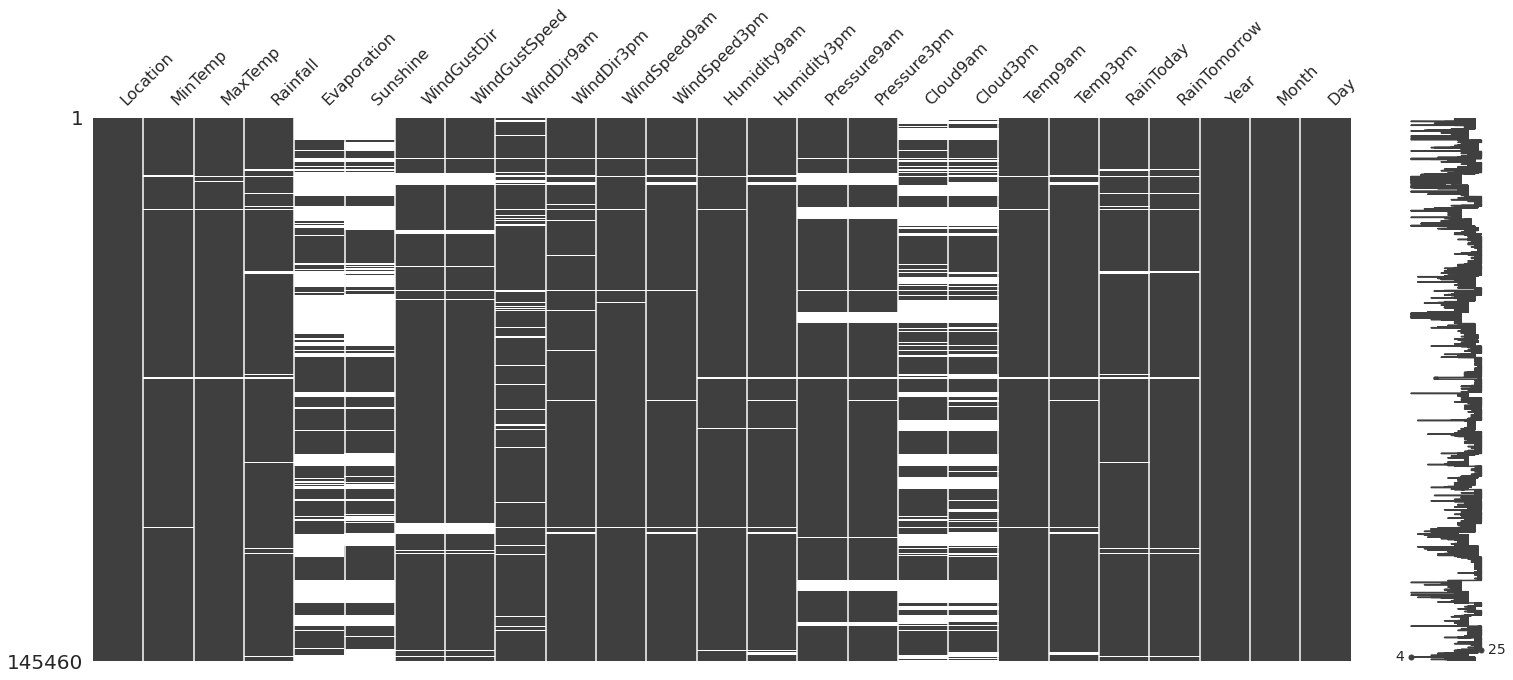

In [11]:
msno.matrix(df)

> Data for Sunshine, Evaporation, Cloud9am and Cloud3am seems pretty missing.

**Nullity Correlation**

<AxesSubplot:>

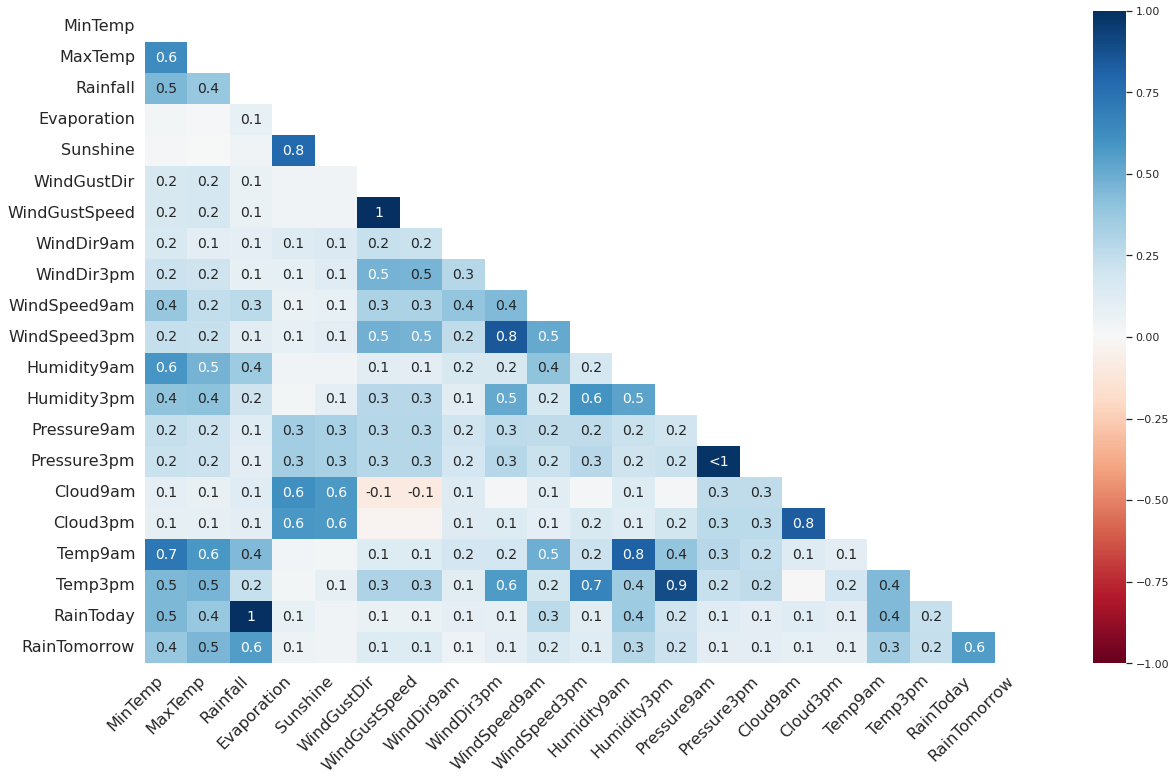

In [12]:
msno.heatmap(df)

## Outliers and Distributions

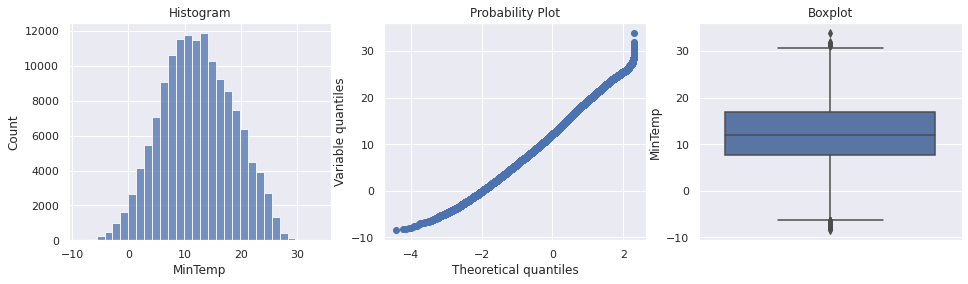

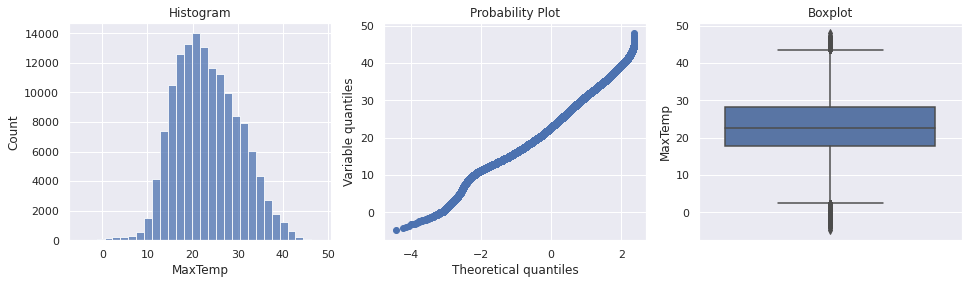

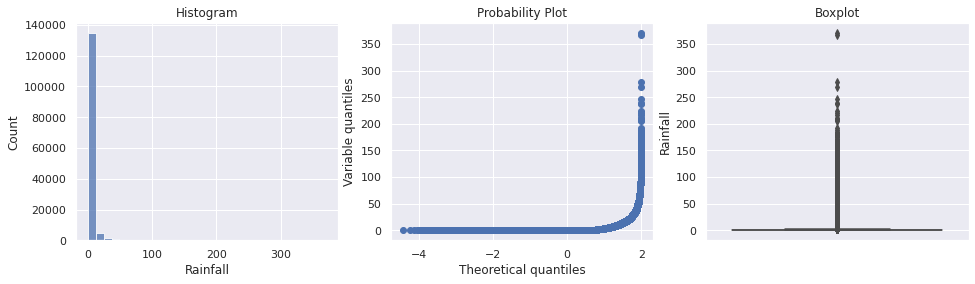

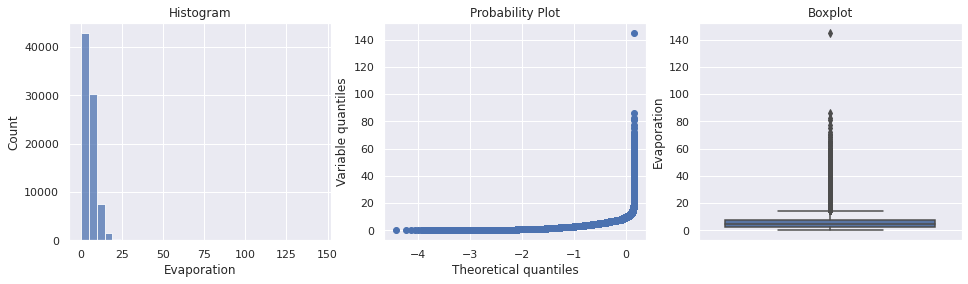

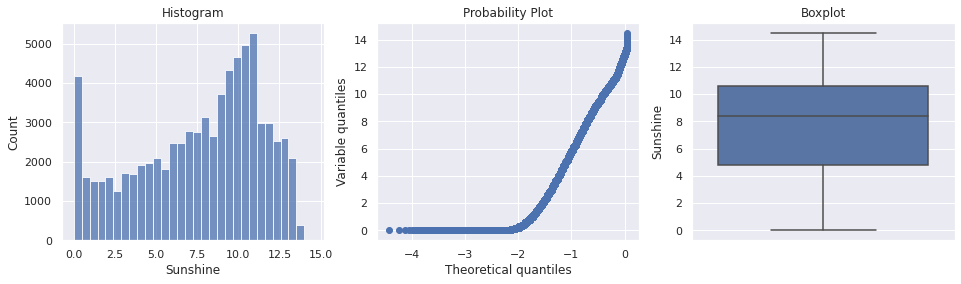

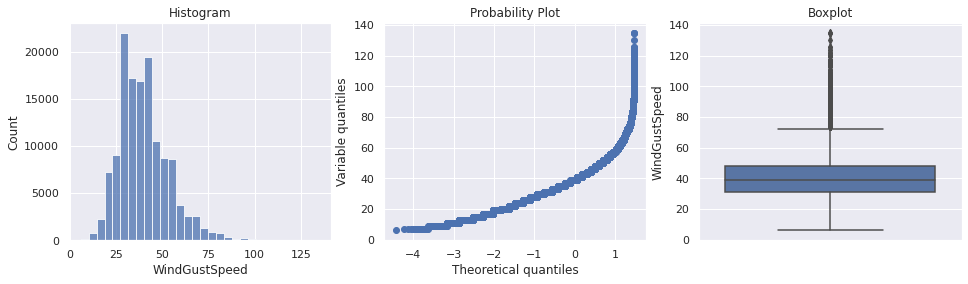

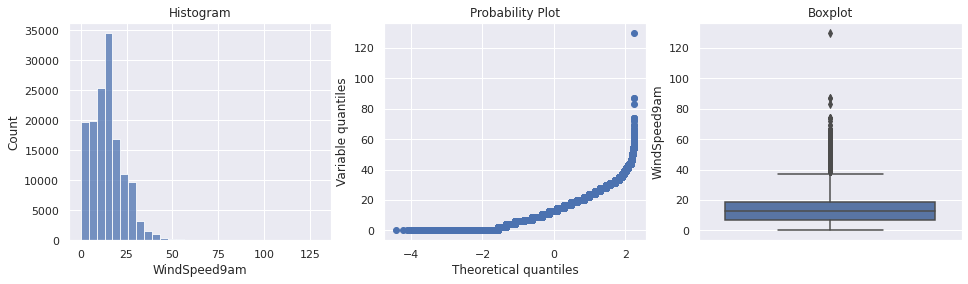

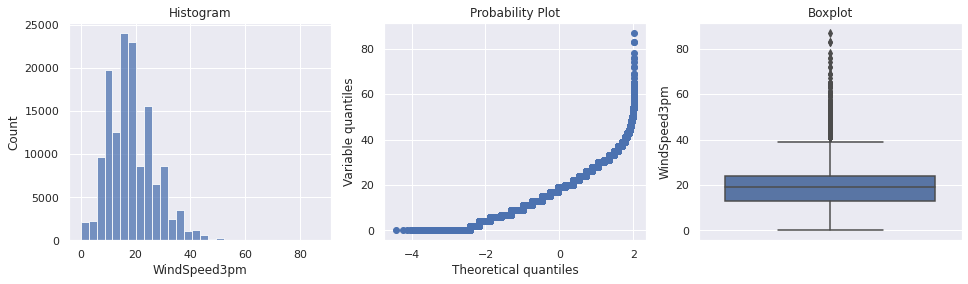

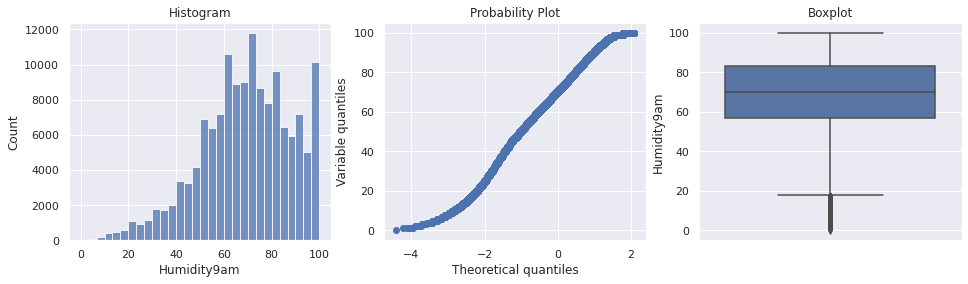

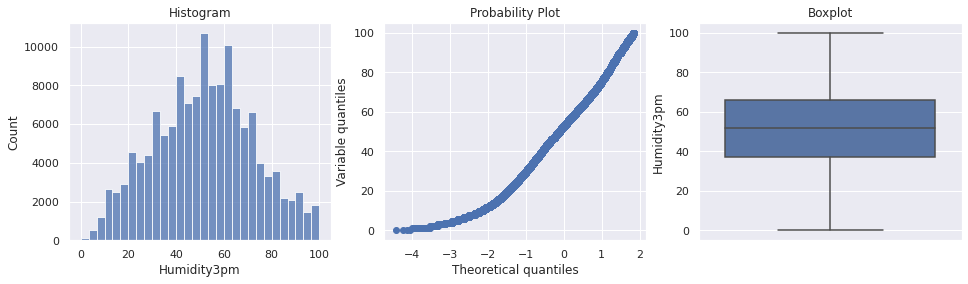

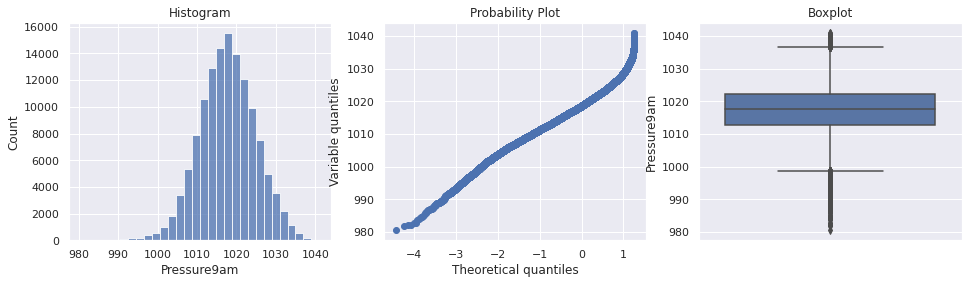

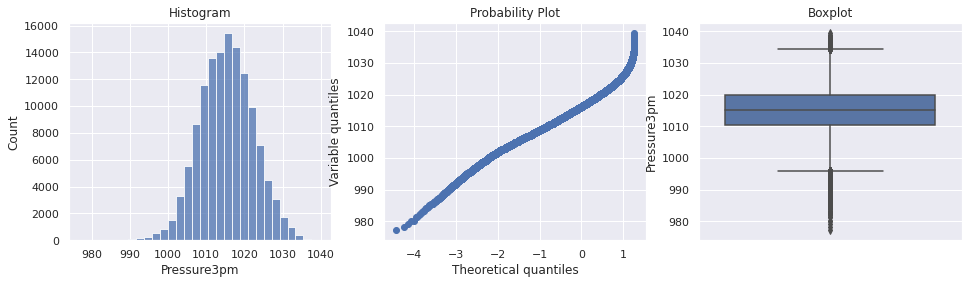

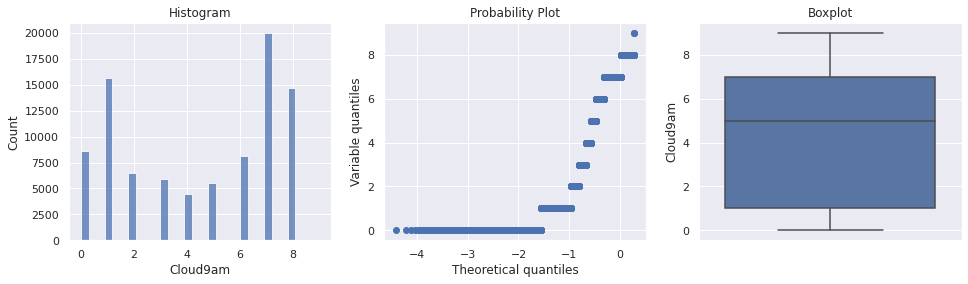

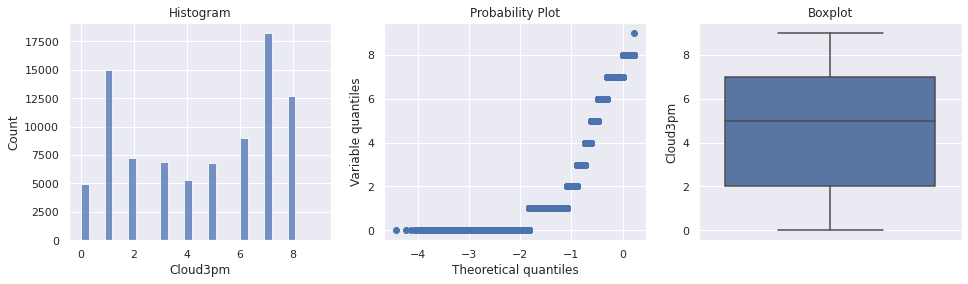

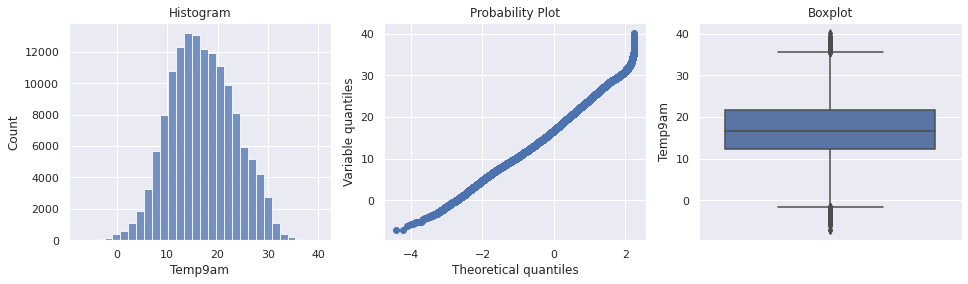

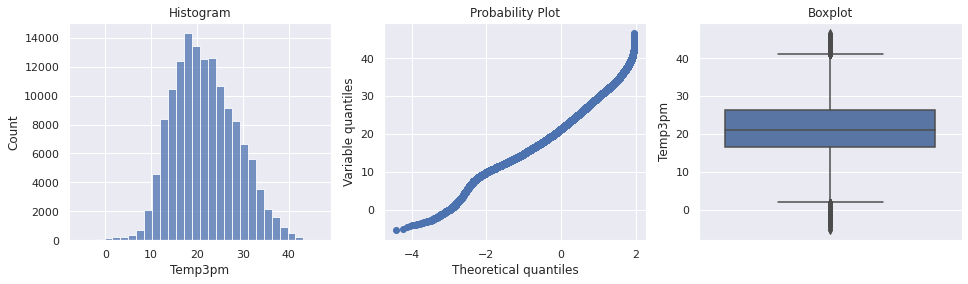

In [13]:
for col in df.columns:
    if df[col].dtype !="O" and df[col].dtype !="int64":
        plt.figure(figsize=(16,4))
        
        plt.subplot(1,3,1)
        sns.histplot(data=df[col],bins=30)
        plt.title("Histogram")
        
        plt.subplot(1,3,2)
        stats.probplot(df[col], dist="norm", plot=plt)
        plt.ylabel('Variable quantiles')
        
        plt.subplot(1,3,3)
        sns.boxplot(y=df[col])
        plt.title("Boxplot")
        plt.show()


> Looking at the outliers, the variables Rainfall, Evaporation, WindSpeed9am and WindSpeed3pm have quite an outlier.

# Data Visualization

Text(0, 0.5, 'Amount of Rainfall')

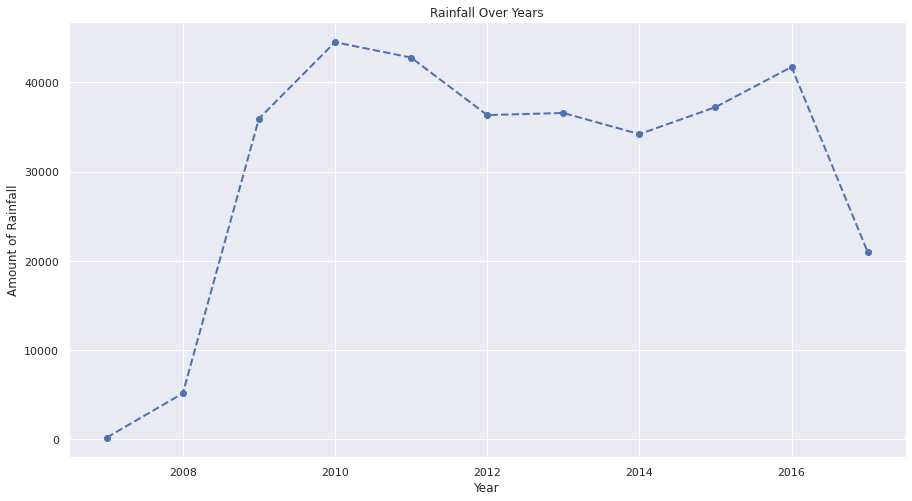

In [14]:
fig = df.groupby(["Year"])["Rainfall"].sum().plot(
    figsize=(15, 8), linewidth=2,style="--o")

fig.set_title('Rainfall Over Years')
fig.set_ylabel('Amount of Rainfall')

<AxesSubplot:xlabel='Sunshine', ylabel='Rainfall'>

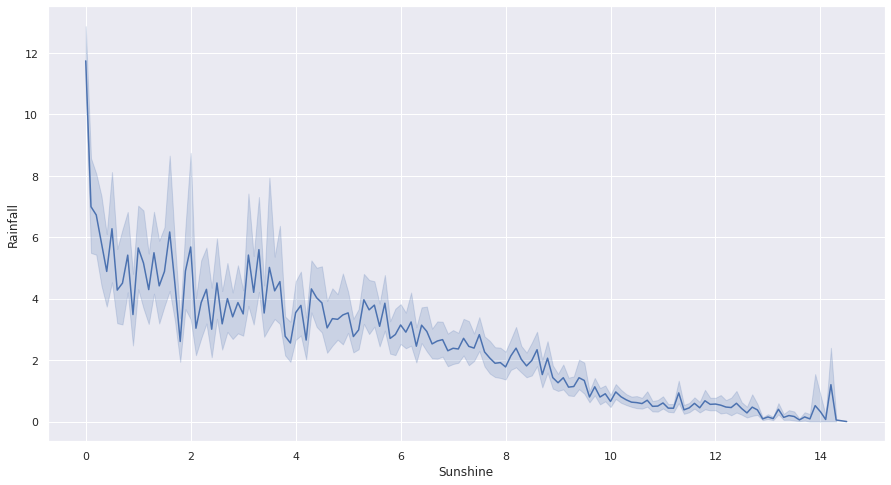

In [15]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(data=df,x="Sunshine",y="Rainfall")


<AxesSubplot:xlabel='WindGustSpeed', ylabel='Rainfall'>

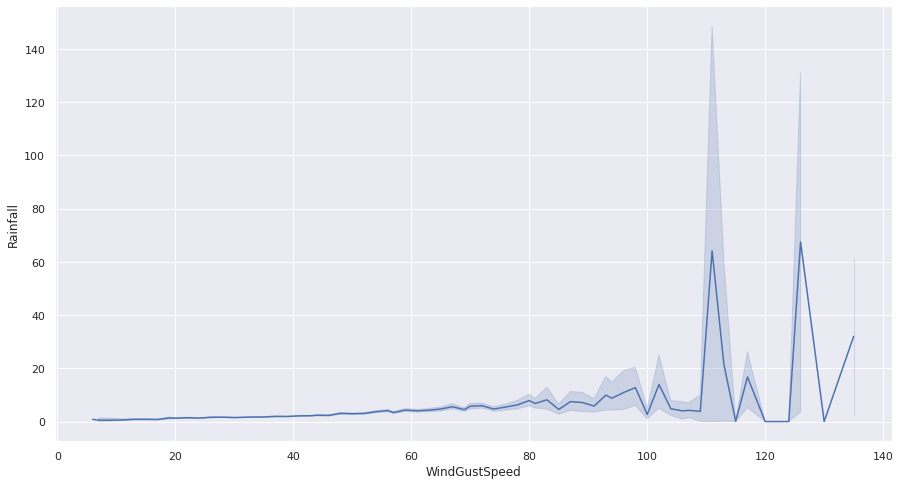

In [16]:
sns.lineplot(data=df,x="WindGustSpeed",y="Rainfall")

## Separate into Training and Testing set

In [17]:
X=df.drop(columns=["RainTomorrow","Year","Month","Day"],axis=1)
y=df["RainTomorrow"]

In [18]:
y.fillna(y.mode()[0], inplace=True)

In [19]:
y=y.map({'Yes':1,'No':0})

<AxesSubplot:>

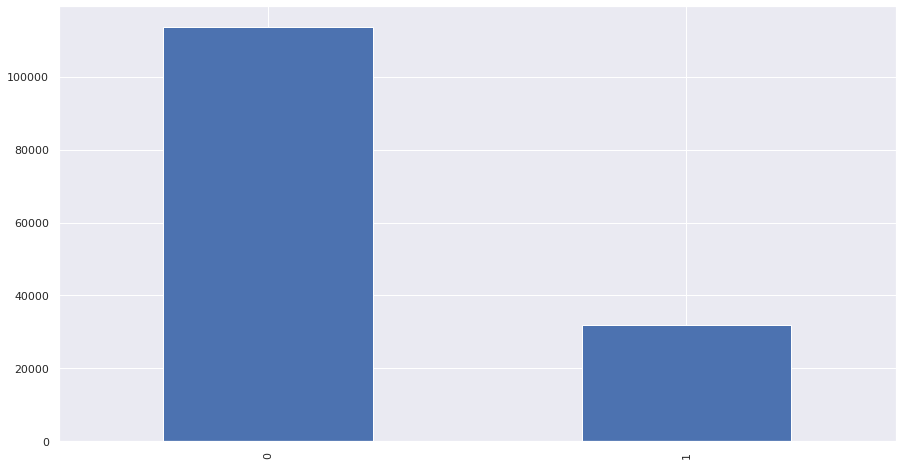

In [20]:
y.value_counts().plot(kind="bar")

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape

((116368, 21), (29092, 21))

# Feature Engineering

In [22]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != "O"]
categorical=[col for col in X_train.columns if X_train[col].dtypes == "O"]

## Missing Data Imputation

In [23]:
numerical_imputation = SimpleImputer(strategy="median")
categorical_imputation = SimpleImputer(strategy="most_frequent")

X_train[numerical]=numerical_imputation.fit_transform(X_train[numerical])
X_test[numerical]=numerical_imputation.fit_transform(X_test[numerical])

X_train[categorical]=categorical_imputation.fit_transform(X_train[categorical])
X_test[categorical]=categorical_imputation.fit_transform(X_test[categorical])



*Median values of numeric variables*

In [24]:
numerical_imputation.statistics_

array([  12. ,   22.7,    0. ,    4.8,    8.5,   39. ,   13. ,   17. ,
         70. ,   52. , 1017.6, 1015.3,    5. ,    5. ,   16.7,   21.2])

*Mode values of categorical variables*

In [25]:
categorical_imputation.statistics_

array(['Sydney', 'W', 'N', 'SE', 'No'], dtype=object)

In [26]:
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [27]:
X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

## Outlier Engineering

**Capping IQR proximity rule**

In [28]:
wins = Winsorizer(capping_method="iqr",
                          tail="both",
                          fold=1.5,
                          variables=["Rainfall", "Evaporation", "WindSpeed9am","WindSpeed3pm"])

wins.fit(X_train)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['Rainfall', 'Evaporation', 'WindSpeed9am',
                      'WindSpeed3pm'])

In [29]:
X_train=wins.transform(X_train)
X_test=wins.transform(X_test)

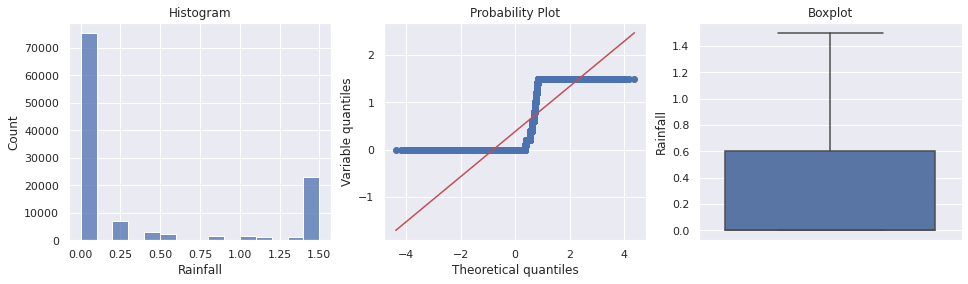

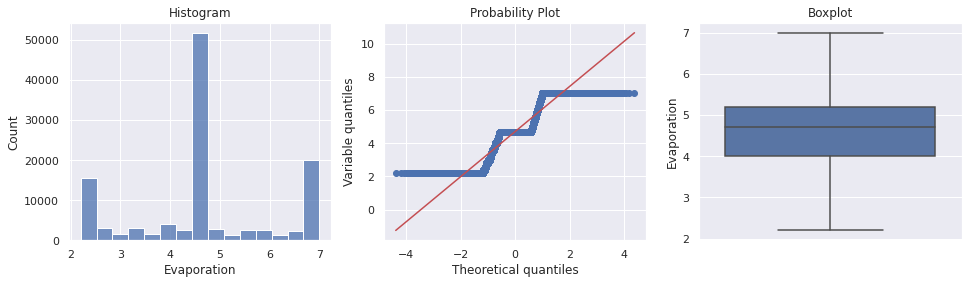

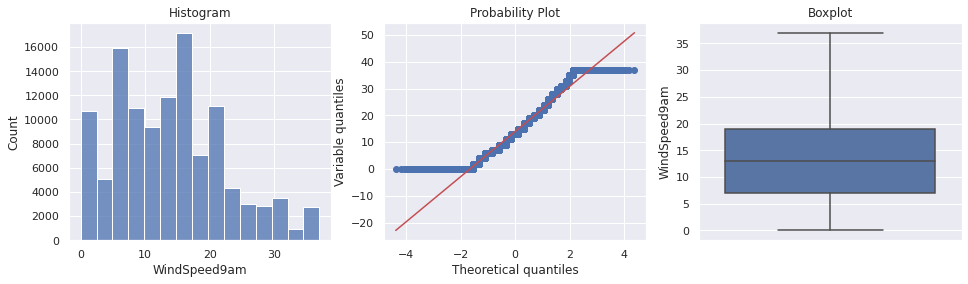

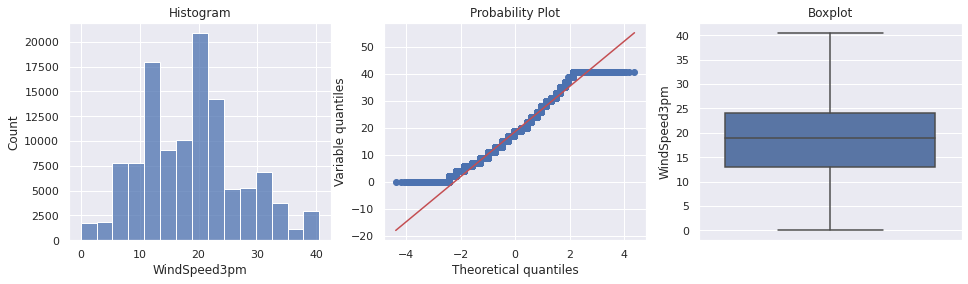

In [30]:
for var in X_train[["Rainfall", "Evaporation", "WindSpeed9am","WindSpeed3pm"]]:
        plt.figure(figsize=(16,4))
        plt.subplot(1,3,1)
        sns.histplot(data=X_train[var],bins=15)
        plt.title("Histogram")
        
        plt.subplot(1,3,2)
        stats.probplot(X_train[var], dist="norm", plot=plt)
        plt.ylabel('Variable quantiles')
        
        plt.subplot(1,3,3)
        sns.boxplot(y=X_train[var])
        plt.title("Boxplot")
        plt.show()

## Categorical Encoding

In [31]:
ohe = OneHotEncoder(sparse=False,handle_unknown="ignore") 

In [32]:
X_train=ohe.fit_transform(X_train)
X_test=ohe.transform(X_test)

## Feature Scaling 

In [33]:
scaler = MinMaxScaler()

In [34]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

In [35]:
log_clf = LogisticRegression(solver="liblinear",penalty="l1", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators = 200,random_state=42)
gbc_clf = GradientBoostingClassifier()

In [36]:
voting_clf = VotingClassifier(
    estimators=[("lr", log_clf), ("rf", rnd_clf),("gbc",gbc_clf)],
    voting="soft",n_jobs=-1)

vt = voting_clf.fit(X_train,y_train)
y_pred_vtt=vt.predict(X_train)
y_pred_vt = vt.predict(X_test)

* "If all classifiers are able to estimate class probabilities (i.e., they have a predict_proba( ) method), then you can tell Scikit-Learn to predict the class with thehighest class probability, averaged over all the individual classifiers. This is called **soft voting**. It often achieves higher performance than hard voting because it gives more weight to highly confident votes. All you need to do is replace **voting="hard"** with **voting="soft"** and ensure that all classifiers can estimate class probabilities." 
     
     (Aurélien Géron, Hands-On Machine Learning with Scikit-Learn and TensorFlow: Concepts, Tools, and Techniques to Build       Intelligent Systems)

# Model Evaluation

In [37]:
for clf in (log_clf, rnd_clf,gbc_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.8460401484944314
RandomForestClassifier 0.8344905816031899
GradientBoostingClassifier 0.8223566616251891


In [38]:
#Test accuracy score
print(f"Accuracy Score for VotingClassifier: {accuracy_score(y_test,y_pred_vt)}")

Accuracy Score for VotingClassifier: 0.8390966588752922


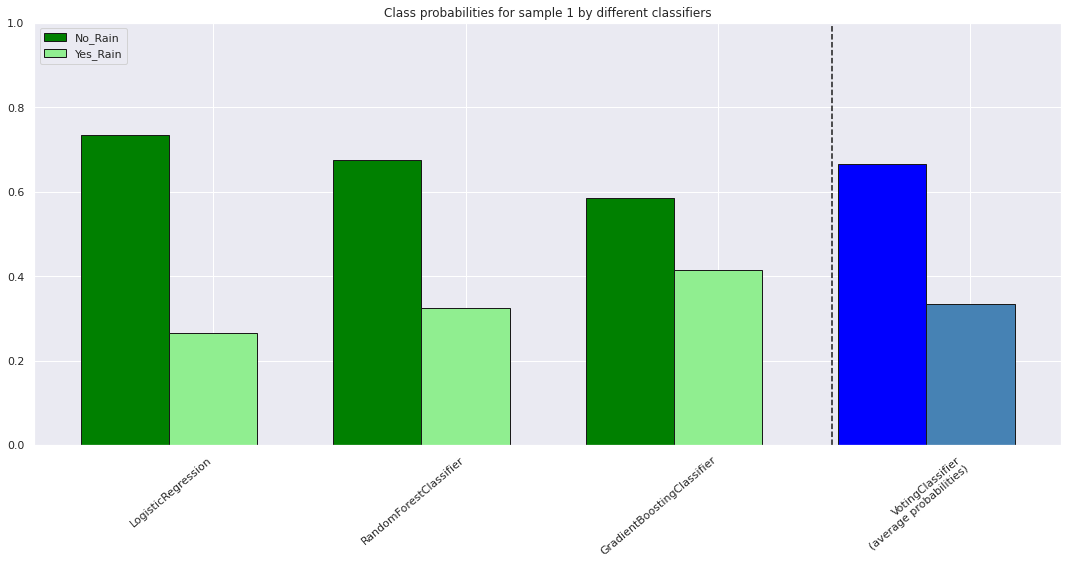

In [39]:
# predict class probabilities for all classifiers
probas = [c.fit(X_train, y_train).predict_proba(X_test) for c in (log_clf, rnd_clf, gbc_clf,voting_clf)]

# get class probabilities for the first sample in the dataset
no_rain_1 = [pr[0, 0] for pr in probas]
yes_rain_1 = [pr[0, 1] for pr in probas]

# plotting

N = 4  # number of groups
ind = np.arange(N)  # group positions
width = 0.35  # bar width

fig, ax = plt.subplots()

# bars for classifier 1-3
p1 = ax.bar(ind, np.hstack(([no_rain_1[:-1], [0]])), width, color="green", edgecolor="k")
p2 = ax.bar(
    ind + width,
    np.hstack(([yes_rain_1[:-1], [0]])),
    width,
    color="lightgreen",
    edgecolor="k",
)

# bars for VotingClassifier
p3 = ax.bar(ind, [0, 0, 0, no_rain_1[-1]], width, color="blue", edgecolor="k")
p4 = ax.bar(
    ind + width, [0, 0, 0, yes_rain_1[-1]], width, color="steelblue", edgecolor="k"
)

# plot annotations
plt.axvline(2.8, color="k", linestyle="dashed")
ax.set_xticks(ind + width)
ax.set_xticklabels(
    [
        "LogisticRegression",
        "RandomForestClassifier",
        "GradientBoostingClassifier",
        "VotingClassifier\n(average probabilities)",
    ],
    rotation=40,
    ha="right",
)
plt.ylim([0, 1])
plt.title("Class probabilities for sample 1 by different classifiers")
plt.legend([p1[0], p2[0]], ["No_Rain", "Yes_Rain"], loc="upper left")
plt.tight_layout()
plt.show()

<AxesSubplot:>

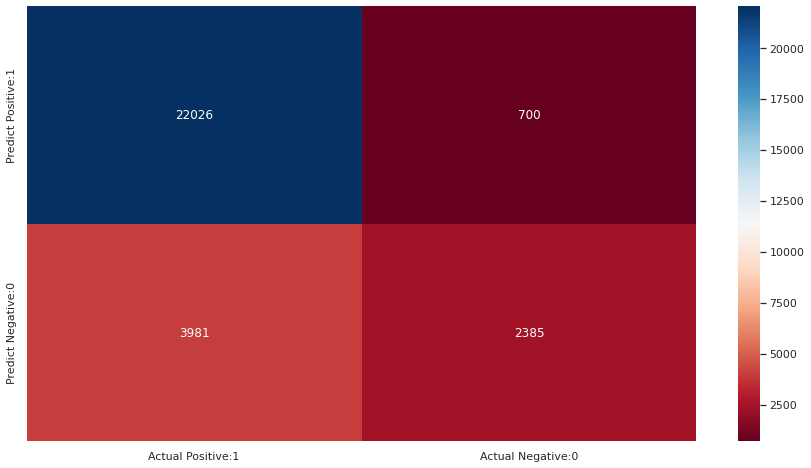

In [40]:
cm=confusion_matrix(y_test, y_pred_vt)
confusion_m = pd.DataFrame(data=cm, columns=["Actual Positive:1", "Actual Negative:0"], 
                           index=["Predict Positive:1", "Predict Negative:0"])

sns.heatmap(confusion_m, annot=True,fmt="d", cmap="RdBu")

In [41]:
#Voting Classifier
print(classification_report(y_test,y_pred_vt))

              precision    recall  f1-score   support

           0       0.85      0.97      0.90     22726
           1       0.77      0.37      0.50      6366

    accuracy                           0.84     29092
   macro avg       0.81      0.67      0.70     29092
weighted avg       0.83      0.84      0.82     29092

